In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings 
warnings.simplefilter('ignore')

In [3]:
pd.set_option('display.max_rows',10)

In [5]:
start='2018-01-01'
end='2021-12-31'
data_master=data.DataReader('^N225','yahoo',start,end)
data_master

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688
...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156


In [6]:
data_master['weekday']=data_master.index.weekday
data_master

,High,Low,Open,Close,Volume,Adj Close,weekday
Date,,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078,3
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297,4
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234,1
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219,2
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688,3
...,...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156,1


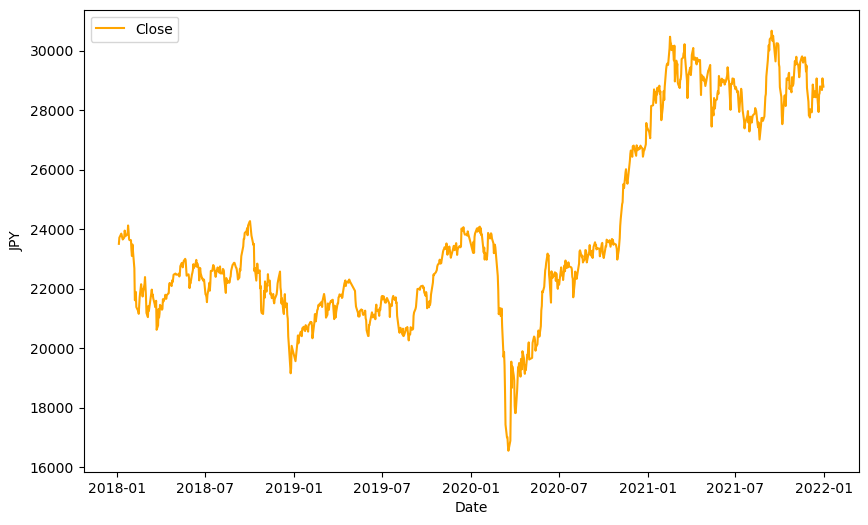

In [7]:
plt.figure(figsize=(10,6))
plt.plot(data_master['Close'],label='Close',color='orange')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

In [8]:
data_technical=data_master.copy()

In [9]:
SMA1=5
SMA2=25
SMA3=50

data_technical['SMA1']=data_technical['Close'].rolling(SMA1).mean()
data_technical['SMA2']=data_technical['Close'].rolling(SMA2).mean()
data_technical['SMA3']=data_technical['Close'].rolling(SMA3).mean()

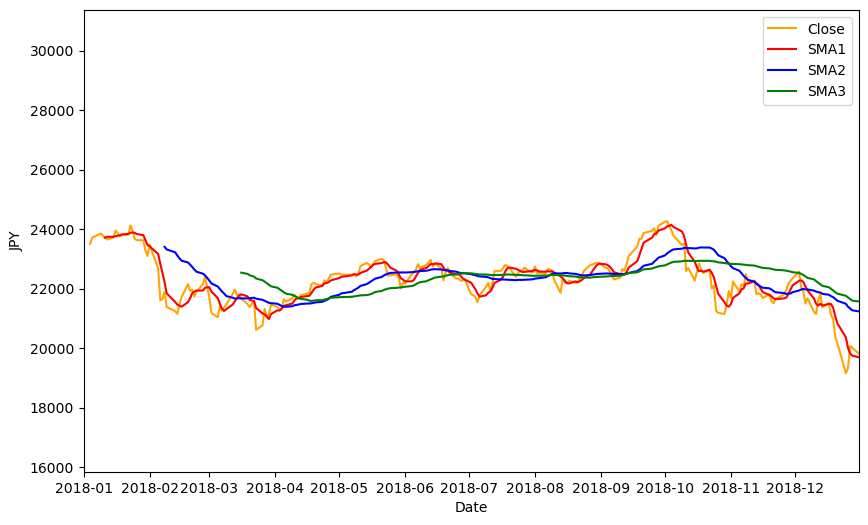

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data_technical['Close'],label='Close',color='orange')
plt.plot(data_technical['SMA1'],label='SMA1',color='red')
plt.plot(data_technical['SMA2'],label='SMA2',color='blue')
plt.plot(data_technical['SMA3'],label='SMA3',color='green')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
xmin=datetime(2018,1,1)
xmax=datetime(2018,12,31)
plt.xlim([xmin,xmax])
plt.show()

In [12]:
data_technical['Body']=data_technical['Open']-data_technical['Close']

data_technical['Close_diff']=data_technical['Close'].diff(1)

data_technical['Close_next']=data_technical['Close'].shift(-1)
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-01-04,23506.330078,23065.199219,23073.730469,23506.330078,102200000.0,23506.330078,3,NaN,NaN,NaN,-432.599609,NaN,23714.529297
2018-01-05,23730.470703,23520.519531,23643.000000,23714.529297,101900000.0,23714.529297,4,NaN,NaN,NaN,-71.529297,208.199219,23849.990234
2018-01-09,23952.609375,23789.029297,23948.970703,23849.990234,94100000.0,23849.990234,1,NaN,NaN,NaN,98.980469,135.460938,23788.199219
2018-01-10,23864.759766,23755.449219,23832.810547,23788.199219,88800000.0,23788.199219,2,NaN,NaN,NaN,44.611328,-61.791016,23710.429688
2018-01-11,23734.970703,23601.839844,23656.390625,23710.429688,83700000.0,23710.429688,3,23713.895703,NaN,NaN,-54.039062,-77.769531,23653.820312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4,28519.714062,28601.921016,28928.558750,53.460938,-15.779297,28676.460938
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0,28667.444141,28559.144688,28931.069375,109.869141,-106.128906,29069.160156
2021-12-28,29121.009766,28879.679688,28953.320312,29069.160156,47000000.0,29069.160156,1,28777.758203,28530.946719,28931.079961,-115.839844,392.699219,28906.880859


In [13]:
data_technical=data_technical.dropna(how='any')
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-03-16,21879.279297,21632.849609,21876.529297,21676.509766,75700000.0,21676.509766,4,21809.975391,21670.343906,22537.595508,200.019531,-127.439453,21480.900391
2018-03-19,21659.039062,21366.880859,21537.900391,21480.900391,67300000.0,21480.900391,0,21741.349609,21674.275156,22497.086914,57.000000,-195.609375,21380.970703
2018-03-20,21384.859375,21223.970703,21297.980469,21380.970703,66500000.0,21380.970703,1,21623.923828,21679.726797,22450.415742,-82.990234,-99.929688,21591.990234
2018-03-22,21592.000000,21349.710938,21352.160156,21591.990234,82600000.0,21591.990234,3,21586.864063,21697.239609,22405.255742,-239.830078,211.019531,20617.859375
2018-03-23,21188.800781,20559.609375,21188.800781,20617.859375,121000000.0,20617.859375,4,21349.646094,21663.354766,22341.848945,570.941406,-974.130859,20766.099609
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,28798.369141,28640.150391,28703.009766,28798.369141,43600000.0,28798.369141,3,28472.332031,28634.563828,28915.712539,-95.359375,236.158203,28782.589844
2021-12-24,28870.130859,28773.500000,28836.050781,28782.589844,35900000.0,28782.589844,4,28519.714062,28601.921016,28928.558750,53.460938,-15.779297,28676.460938
2021-12-27,28805.279297,28658.820312,28786.330078,28676.460938,37500000.0,28676.460938,0,28667.444141,28559.144688,28931.069375,109.869141,-106.128906,29069.160156


In [14]:
data_technical=data_technical[data_technical['weekday']==3]

In [15]:
data_technical

,High,Low,Open,Close,Volume,Adj Close,weekday,SMA1,SMA2,SMA3,Body,Close_diff,Close_next
Date,,,,,,,,,,,,,
2018-03-22,21592.000000,21349.710938,21352.160156,21591.990234,82600000.0,21591.990234,3,21586.864063,21697.239609,22405.255742,-239.830078,211.019531,20617.859375
2018-03-29,21298.570312,20996.220703,21250.960938,21159.080078,78900000.0,21159.080078,3,20978.333984,21523.692344,22126.706328,91.880859,127.769531,21454.300781
2018-04-05,21737.660156,21462.099609,21541.179688,21645.419922,80700000.0,21645.419922,3,21420.028125,21398.060000,21881.104141,-104.240234,325.869141,21567.519531
2018-04-12,21719.429688,21591.390625,21657.869141,21660.279297,58400000.0,21660.279297,3,21677.495703,21468.811875,21685.584492,-2.410156,-26.820312,21778.740234
2018-04-19,22360.650391,22176.859375,22231.859375,22191.179688,79700000.0,22191.179688,3,21962.247656,21524.993906,21598.784297,40.679688,32.980469,22162.240234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29444.449219,29469.650391,29499.279297,50700000.0,29499.279297,3,29584.115625,29353.651562,29289.329609,-29.628906,196.619141,28751.619141
2021-12-02,27938.550781,27644.960938,27716.199219,27753.369141,77400000.0,27753.369141,3,28109.257422,29196.487031,29051.203945,-37.169922,-182.250000,28029.570312
2021-12-09,28908.289062,28725.470703,28827.320312,28725.470703,54400000.0,28725.470703,3,28399.725781,29037.272187,28888.137656,101.849609,-135.148438,28437.769531


In [16]:
data_technical=data_technical[['High','Close','Low','Open','Body','Close_diff','SMA1','SMA2','SMA3','Close_next']]

In [17]:
data_technical

,High,Close,Low,Open,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2018-03-22,21592.000000,21591.990234,21349.710938,21352.160156,-239.830078,211.019531,21586.864063,21697.239609,22405.255742,20617.859375
2018-03-29,21298.570312,21159.080078,20996.220703,21250.960938,91.880859,127.769531,20978.333984,21523.692344,22126.706328,21454.300781
2018-04-05,21737.660156,21645.419922,21462.099609,21541.179688,-104.240234,325.869141,21420.028125,21398.060000,21881.104141,21567.519531
2018-04-12,21719.429688,21660.279297,21591.390625,21657.869141,-2.410156,-26.820312,21677.495703,21468.811875,21685.584492,21778.740234
2018-04-19,22360.650391,22191.179688,22176.859375,22231.859375,40.679688,32.980469,21962.247656,21524.993906,21598.784297,22162.240234
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29499.279297,29444.449219,29469.650391,-29.628906,196.619141,29584.115625,29353.651562,29289.329609,28751.619141
2021-12-02,27938.550781,27753.369141,27644.960938,27716.199219,-37.169922,-182.250000,28109.257422,29196.487031,29051.203945,28029.570312
2021-12-09,28908.289062,28725.470703,28725.470703,28827.320312,101.849609,-135.148438,28399.725781,29037.272187,28888.137656,28437.769531


In [18]:
train=data_technical['2018-01-01':'2020-12-31']
train

,High,Close,Low,Open,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2018-03-22,21592.000000,21591.990234,21349.710938,21352.160156,-239.830078,211.019531,21586.864063,21697.239609,22405.255742,20617.859375
2018-03-29,21298.570312,21159.080078,20996.220703,21250.960938,91.880859,127.769531,20978.333984,21523.692344,22126.706328,21454.300781
2018-04-05,21737.660156,21645.419922,21462.099609,21541.179688,-104.240234,325.869141,21420.028125,21398.060000,21881.104141,21567.519531
2018-04-12,21719.429688,21660.279297,21591.390625,21657.869141,-2.410156,-26.820312,21677.495703,21468.811875,21685.584492,21778.740234
2018-04-19,22360.650391,22191.179688,22176.859375,22231.859375,40.679688,32.980469,21962.247656,21524.993906,21598.784297,22162.240234
...,...,...,...,...,...,...,...,...,...,...
2020-11-26,26560.029297,26537.310547,26255.470703,26255.470703,-281.839844,240.451172,26032.293750,24662.887969,24048.628594,26644.710938
2020-12-03,26868.089844,26809.369141,26719.230469,26740.300781,-69.068359,8.388672,26695.243750,25297.518281,24373.841367,26751.240234
2020-12-10,26852.769531,26756.240234,26639.980469,26688.500000,-67.740234,-61.699219,26667.987891,25962.384219,24710.423164,26652.519531


In [20]:
test=data_technical['2020-01-01':]
test

,High,Close,Low,Open,Body,Close_diff,SMA1,SMA2,SMA3,Close_next
Date,,,,,,,,,,
2020-01-09,23767.089844,23739.869141,23506.150391,23530.289062,-209.580078,535.109375,23476.365625,23623.723828,23411.324336,23850.570312
2020-01-16,23975.380859,23933.130859,23905.380859,23960.199219,27.068359,16.550781,23893.064063,23718.956641,23496.146758,24041.259766
2020-01-23,23910.009766,23795.439453,23779.230469,23843.509766,48.070312,-235.910156,23963.223828,23831.123047,23579.190352,23827.179688
2020-01-30,23318.570312,22977.750000,22892.949219,23284.580078,306.830078,-401.650391,23348.710156,23707.231172,23579.958594,23205.179688
2020-02-06,23995.369141,23873.589844,23625.130859,23641.099609,-232.490234,554.029297,23290.971875,23598.381172,23585.058164,23827.980469
...,...,...,...,...,...,...,...,...,...,...
2021-11-25,29570.419922,29499.279297,29444.449219,29469.650391,-29.628906,196.619141,29584.115625,29353.651562,29289.329609,28751.619141
2021-12-02,27938.550781,27753.369141,27644.960938,27716.199219,-37.169922,-182.250000,28109.257422,29196.487031,29051.203945,28029.570312
2021-12-09,28908.289062,28725.470703,28725.470703,28827.320312,101.849609,-135.148438,28399.725781,29037.272187,28888.137656,28437.769531


In [22]:
X_train=train.drop(columns=['Close_next'])
y_train=train['Close_next']

X_test=test.drop(columns=['Close_next'])
y_test=test['Close_next']

In [23]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error as mse

In [24]:
valid_scores=[]
tscv=TimeSeriesSplit(n_splits=4)

for fold, (train_indices,valid_indices) in enumerate(tscv.split(X_train)):
    X_train_cv, X_valid_cv=X_train.iloc[train_indices], X_train.iloc[valid_indices]
    y_train_cv, y_valid_cv=y_train.iloc[train_indices], y_train.iloc[valid_indices]
    
    model=LinearRegression()
    
    model.fit(X_train_cv, y_train_cv)
    
    y_valid_pred=model.predict(X_valid_cv)
    
    score=np.sqrt(mse(y_valid_cv,y_valid_pred))
    
    valid_scores.append(score)

In [25]:
print(f'valid_scores:{valid_scores}')
cv_score=np.mean(valid_scores)
print(f'CV score:{cv_score}')

valid_scores:[342.72206422742835, 165.28688352770695, 438.31759952530484, 207.89846981311723]
CV score:288.5562542733893


In [26]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

score=np.sqrt(mse(y_test,y_pred))
print(f'RMSE:{score}')

RMSE:375.5161790087922


In [27]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

score=np.sqrt(mse(y_test,y_pred))
print(f'RMSE:{score}')

RMSE:375.5161790087922


In [28]:
df_result=test[['Close_next']]
df_result['Close_pred']=y_pred
df_result

,Close_next,Close_pred
Date,,
2020-01-09,23850.570312,23605.313555
2020-01-16,24041.259766,23907.066257
2020-01-23,23827.179688,23755.292958
2020-01-30,23205.179688,22930.110741
2020-02-06,23827.980469,23824.964386
...,...,...
2021-11-25,28751.619141,29219.743759
2021-12-02,28029.570312,27471.017238
2021-12-09,28437.769531,28711.665372


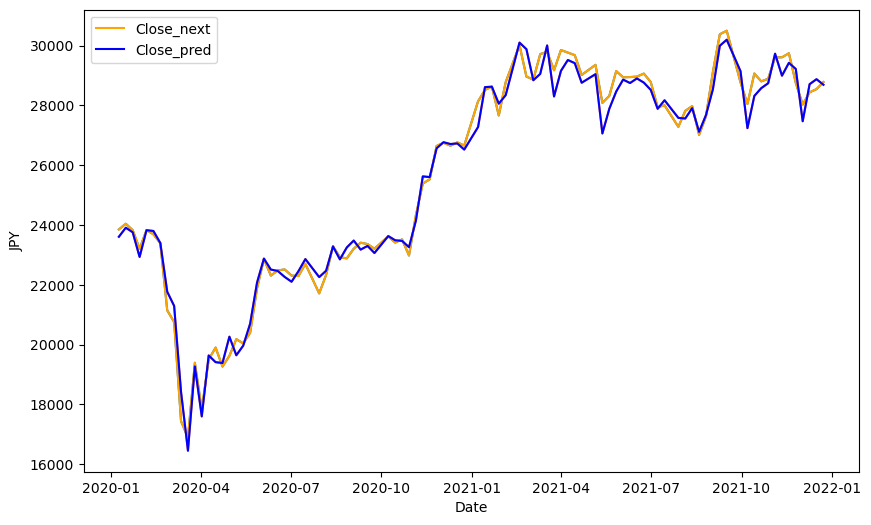

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df_result[['Close_next','Close_pred']])
plt.plot(df_result['Close_next'],label='Close_next',color='orange')
plt.plot(df_result['Close_pred'],label='Close_pred',color='blue')
plt.xlabel('Date')
plt.ylabel('JPY')
plt.legend()
plt.show()

In [30]:
df_result['diff']=df_result['Close_pred']-df_result['Close_next']

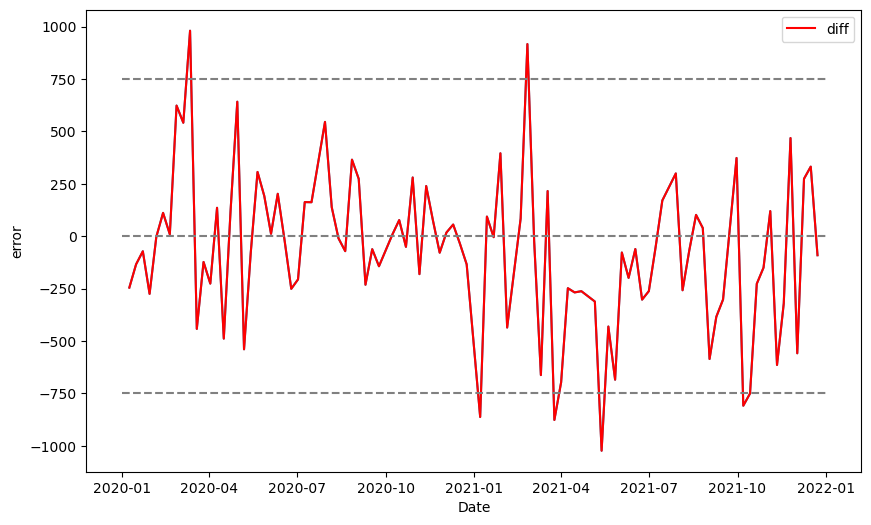

In [34]:
xmin='2020-01-01'
xmax='2022-01-01'
xmin=pd.to_datetime(xmin)
xmax=pd.to_datetime(xmax)
plt.figure(figsize=(10,6))
plt.plot(df_result[['diff']])
plt.plot(df_result['diff'],label='diff',color='red')
plt.xlabel('Date')
plt.ylabel('error')
plt.hlines(0,xmin,xmax,color='gray',linestyle='--')
plt.hlines(750,xmin,xmax,color='gray',linestyles='--')
plt.hlines(-750,xmin,xmax,color='gray',linestyles='--')
plt.legend()
plt.show()

In [35]:
coef=pd.DataFrame(model.coef_)
coef.index=X_train.columns
coef

,0
High,-0.257948
Close,1.106424
Low,-0.144192
Open,0.676528
Body,-0.429896
Close_diff,-0.327491
SMA1,-0.377530
SMA2,-0.018368
SMA3,-0.007697


In [36]:
model.intercept_

502.3981776471737

In [37]:
X_train.describe()

,High,Close,Low,Open,Body,Close_diff,SMA1,SMA2,SMA3
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,22301.674932,22176.387653,22069.684917,22206.909519,30.521867,-26.370881,22169.417589,22094.841323,22042.295932
std,1590.932344,1626.318778,1636.271763,1591.048626,163.410890,265.136289,1578.624400,1369.760197,1118.766909
min,17160.970703,16552.830078,16358.190430,16995.769531,-371.429688,-915.179688,16944.800000,18432.688438,19182.756758
25%,21446.345215,21331.381836,21234.909668,21371.152344,-64.075195,-162.933594,21257.859473,21336.133359,21263.944746
50%,22320.160156,22230.804688,22111.674805,22243.844727,21.565430,-3.995117,22197.080078,22163.749492,22089.020469
75%,23203.060547,23023.372559,22888.586914,23110.392090,114.844238,118.366211,23138.541797,22874.516094,22723.779355
max,26868.089844,26809.369141,26719.230469,26744.500000,570.169922,750.558594,26727.373828,26548.873437,25358.306563
